# Alberi Decisionali

nella lezione precedente abbiamo studiato che k-NN è un modello che predice nuovi valori modellando un predittore piecewise-constant. Ogni pezzo del predittore è una funzione che implicitamente mappa un insieme di valori a una regione decisionale.  
Un'alternativa a k-NN sono gli **alberi decisionali** che sono complementari a k-NN nel fatto che definiscono anche regioni, ma il modo in cui sono definite è diverso. Specificamente, gli alberi decisionali **esplicitamente** definiscono regioni decisionali basate su regole applicate alle variabili di input.

L'idea di base dietro un albero decisionale è usare un modello basato su regole organizzato come un albero binario.  
Questo albero binario partiziona lo spazio di input $ R^p $ in sottorigioni $ R_m $ che sono disgiunte $ R_m \cup R_{m'} = 0 \text{ per } m \ne m' $, e dove $ M $ è il numero di regioni  

$ \mathbb{R}^p = \bigcup_{m=1}^{M} R_m $  

insieme a un predittore piecewise-constant  

$ \hat{y}(x) = c_m \text{ se } x \in{R_m} $

## Regole e struttura dell'albero

Le regioni disgiunte sono create applicando ricorsivamente un insieme di regole sulle feature di input.  
Iniziamo dalla radice, dove viene applicata una regola: $ x_j \leq t $ ? Dove $ t $ è una soglia e $ x_j $ è una feature di input.  
Se la condizione è soddisfatta, viene prodotta una regione Foglia (sinistra), che definisce una regione decisionale $ R_m $ dove la funzione assume un valore costante $ c_m $, per esempio $ R_1 -> c_1 $.  
Se la condizione non è soddisfatta, l'input viene inviato al figlio destro che può essere un *nodo interno* (con un nuovo valore di soglia $ s $ per una nuova feature di input $ x_k $) o un *nodo foglia* a seconda del caso.  

Per ogni regione foglia definita $ R_m $ possiamo identificare l'insieme di indici dei campioni di addestramento appartenenti a quella regione:  
$ S_m = \{ i : x_i \in R_m \} $ 
Quindi per ogni regione foglia il predittore produce un valore costante $ c_m $ e questo valore dipende solo dai campioni dell'insieme di addestramento associati all'insieme di indici $ S_m $  

Come abbiamo visto in K-NN, il valore effettivo della costante $ c_m $ prodotta dal predittore dipende da un calcolo che varia da un problema di classificazione o regressione.  

Per la *regressione*, viene utilizzato il valore medio degli output di addestramento $ y_i $ nella regione $ R_m $.  
$ c_m = \frac{1}{|S_m|}\sum_{i\in S_m} y_i $  
Per la *classificazione*, la predizione è la classe più frequente tra i campioni in $ S_m $, dove $ n_{c}(S_m) $ denota il numero di campioni in $ S_m $ appartenenti alla classe $ c $.  
$ c_m = \arg\max_{c \in \mathcal{C}} n_c(S_m). $

Le regole vengono applicate per consentire all'albero decisionale di dividere lo spazio di input in due regioni più piccole progressivamente. La regola agisce come un *taglio geometrico* che dividere una regione in una regione sinistra $ R_{L}(j,\leq t) $ e una regione destra $ R_{R}(j,t) $. Da una prospettiva geometrica, questa operazione corrisponde a dividere lo spazio di input con un iperpiano che è ortogonale a uno degli assi coordinati. Da una prospettiva statistica, separa i campioni di addestramento in due gruppi, che vengono valutati indipendentemente.  

Lo scopo della divisione è *ridurre l'incertezza* sulla variabile di output. **Una buona divisione è quella che produce nodi figli in cui gli output sono più concentrati, meno variabili, o più coerenti rispetto al nodo genitore**.  

Quindi può sorgere una domanda: *quale è la migliore divisione che possiamo scegliere?*  
La risposta dipende dal compito di apprendimento. Sia nella regressione che nella classificazione, il principio guida è lo stesso: una buona divisione è quella che produce nodi figli che sono più omogenei, o meno incerti, dal nodo genitore.  Per rispondere a questa domanda, ora introduciamo il concetto di $ \text{impurità}$ e selezioniamo la divisione che produce la **riduzione più grande dell'impurità**.  

# Regressione

Nei problemi di regressione, le variabili di output sono numeriche. Quindi il concetto di omogeneità all'interno di un nodo corrisponde ad avere valori di output che sono vicini l'uno all'altro.  
Una quantità in grado di descrivere la proprietà di "vicinanza" dei valori di output è l'Errore Quadratico Medio (MSE) che misura *quanto sono dispersi gli output attorno alla loro media*.  
Per un dato nodo della regione $ R_m $ associato a un insieme di indici $ S $, il valore medio (media) di output è:  
$\bar{y}_S = \frac{1}{\lvert S\rvert} \sum_{i \in S} y_i$  
Quindi possiamo misurare quanto ogni valore di output $ y_i $ è distante dalla media $ \bar{y}_S $, sommiamo tutte le distanze di ogni output e calcoliamo il valore medio  
$\mathrm{MSE}(S)=\frac{1}{\lvert S\rvert}\sum_{i\in S}\left(y_i-\bar{y}_S\right)^2$  
Minore è il valore MSE, più vicini e meno dispersi sono i valori di output all'interno di un nodo.  
   
## Riduzione dell'impurità
Possiamo ora valutare la qualità di una divisione misurando la riduzione dell'impurità causata da tale divisione. Una volta che una divisione è stata fatta abbiamo due partizioni di S, e possiamo calcolare la media ponderata delle impurità (quindi la media ponderata dell'MSE delle due regioni), dove il peso è il valore di $ \frac{| S_{L/R} |}{| S |} $, e sommiamo i due MSE ponderati per ottenere l'$ MSE_{post} $.  
La qualità della divisione è:  $ \Delta_{reg}(j,t) = MSE(S) - MSE_{post} $  

La **divisione ottimale** è quella che massimizza $ \Delta_{reg}(j,t) $.

In [ ]:
# Esempio
# consideriamo il seguente dataset di una feature x_1 e una variabile target y:

dataset = [
    (1.0, 1.2),
    (1.8, 1.8),
    (2.7, 2.6),
    (3.2, 3.9),
    (3.8, 4.1),
    (4.5, 4.8)
]

# trattiamo output numerici, quindi questo è un problema di regressione. l'obiettivo è valutare la qualità di una divisione, per esempio, x_1 <= 2.5
# abbiamo bisogno di calcolare l'MSE_post, che ha bisogno dell'MSE di ogni divisione. Per l'MSE abbiamo bisogno innanzitutto del valore medio/medio output:

Y_avg = sum(y for _, y in dataset) / len(dataset)
print("Valore di output medio:", Y_avg)

MSE_Y = sum((y - Y_avg) ** 2 for _, y in dataset) / len(dataset)
print("MSE dell'intero dataset:", MSE_Y)

# adesso applichiamo la divisione e calcoliamo l'MSE_post, dalla media ponderata dell'MSE di ogni divisione:
rule = 2.5
split_left = [(x, y) for x, y in dataset if x <= rule]
split_right = [(x, y) for x, y in dataset if x > rule]
Y_avg_left = sum(y for _, y in split_left) / len(split_left)
Y_avg_right = sum(y for _, y in split_right) / len(split_right)
MSE_left = sum((y - Y_avg_left) ** 2 for _, y in split_left) / len(split_left)
MSE_right = sum((y - Y_avg_right) ** 2 for _, y in split_right) / len(split_right)
MSE_post = (len(split_left) * MSE_left + len(split_right) * MSE_right) / len(dataset)
print("MSE dopo la divisione:", MSE_post)

# adesso possiamo calcolare il Delta di impurità:
Delta = MSE_Y - MSE_post
print("Delta di impurità:", Delta)

## Stamperà "Impurity Delta: 1.227222222222222"
# poiché Delta è positivo, significa che la divisione ha ridotto l'MSE, e quindi è una buona divisione.

Average output value: 3.0666666666666664
MSE of the whole dataset: 1.6788888888888887
MSE after the split: 0.4516666666666666
Impurity Delta: 1.227222222222222


# Classificazione

Nei problemi di classificazione, le variabili di output sono categoriche. Quindi il concetto di omogeneità all'interno di un nodo corrisponde ad avere valori di output che sono prevalentemente di una singola classe.  
Una quantità in grado di descrivere la proprietà di "predominanza" dei valori di output è la proporzione $ p_{c}(S) $ di un campione appartenente alla classe $ c $ in un nodo $ S $, che misura *la classe più frequente/predominante in una regione*.  
Per un dato nodo della regione $ R_m $ associato a un insieme di indici $ S $, il valore di proporzione di una classe $ c $ è:  
$\bar{y}_S = \frac{1}{\lvert S\rvert} \sum_{i \in S} y_i$  
La misura di impurità quantifica quanto mischiate sono le classi all'interno di un nodo. Possiamo usare due misure per l'impurità: Gini e Entropia.  

## Gini
L'impurità di Gini è zero se tutti i campioni all'interno di una regione appartengono alla stessa classe, e aumenta man mano che la distribuzione di classe diventa più uniforme.  
$G(S)=1-\sum_{c\in\mathcal{C}}p_c(S)^2$  

## Entropia
L'entropia misura l'incertezza associata alla predizione dell'etichetta di classe, e ha un'interpretazione teorica dell'informazione.  
$H(S) = -\sum_{c \in C} p_c(S)\log_2 p_c(S)$  

## Riduzione dell'impurità   
Possiamo ora valutare la qualità di una divisione misurando la riduzione dell'impurità causata da tale divisione. Una volta che una divisione è stata fatta abbiamo due partizioni di S, e possiamo calcolare l'impurità post-divisione come la somma della media ponderata della misura di impurità - sia Gini che Entropia - di ogni partizione, ottenendo l'$ I_{post} $.  
Il miglioramento associato alla divisione è:  $ \Delta_{cls}(j,t) = I(S) - I_{post} $  

La **divisione ottimale** è quella che massimizza $ \Delta_{cls}(j,t) $.

In [ ]:
# Esempio
## Usiamo un dataset con 10 campioni, classe A = 5 e classe B = 5, e una divisione candidata che produce: SL: A=3, B=1 e SR: A=2, B=4.
import numpy as np

dataset = [ 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B' ]
# per prima cosa calcoliamo la proporzione di ogni classe nell'intero dataset:
p_A = dataset.count('A') / len(dataset)
p_B = dataset.count('B') / len(dataset)
print("Proportion of class A:", p_A)
print("Proportion of class B:", p_B)
proportions = [p_A, p_B]

# Ora calcoliamo Gini ed Entropia per l'intero dataset:
Gini_Y = 1 - sum(p ** 2 for p in proportions)
Entropy_Y = -sum(p * np.log2(p) for p in proportions if p > 0)
print("Gini of the whole dataset:", Gini_Y)
print("Entropy of the whole dataset:", Entropy_Y)

# Ora applichiamo la divisione e calcoliamo Gini ed Entropia per ciascuna partizione:
split_left = ['A', 'A', 'A', 'B']
split_right = ['A', 'A', 'B', 'B', 'B', 'B']
p_A_left = split_left.count('A') / len(split_left)
p_B_left = split_left.count('B') / len(split_left)
p_A_right = split_right.count('A') / len(split_right)
p_B_right = split_right.count('B') / len(split_right)
print("Proportion of class A in left split:", p_A_left)
print("Proportion of class B in left split:", p_B_left)
print("Proportion of class A in right split:", p_A_right)
print("Proportion of class B in right split:", p_B_right)
proportions_left = [p_A_left, p_B_left]
proportions_right = [p_A_right, p_B_right]

Gini_left = 1 - sum(p ** 2 for p in proportions_left)
Gini_right = 1 - sum(p ** 2 for p in proportions_right)
Entropy_left = -sum(p * np.log2(p) for p in proportions_left if p > 0)
Entropy_right = -sum(p * np.log2(p) for p in proportions_right if p > 0)
print("Gini of left split:", Gini_left)
print("Gini of right split:", Gini_right)
print("Entropy of left split:", Entropy_left)
print("Entropy of right split:", Entropy_right)

# Ora calcoliamo la media ponderata di Gini ed Entropia per le partizioni:
Gini_post = (len(split_left) * Gini_left + len(split_right) * Gini_right) / len(dataset)
Entropy_post = (len(split_left) * Entropy_left + len(split_right) * Entropy_right) / len(dataset)
print("Gini after the split:", Gini_post)
print("Entropy after the split:", Entropy_post)

# Infine calcoliamo il Delta di impurita per Gini ed Entropia:
Delta_Gini = Gini_Y - Gini_post
Delta_Entropy = Entropy_Y - Entropy_post
print("Impurity Delta for Gini:", Delta_Gini)
print("Impurity Delta for Entropy:", Delta_Entropy)

# Possiamo osservare che la riduzione di impurita con Gini e << 0.1, quindi la divisione non introduce purezza ed e meglio lasciare il dataset non diviso.

Proportion of class A: 0.5
Proportion of class B: 0.5
Gini of the whole dataset: 0.5
Entropy of the whole dataset: 1.0
Proportion of class A in left split: 0.75
Proportion of class B in left split: 0.25
Proportion of class A in right split: 0.3333333333333333
Proportion of class B in right split: 0.6666666666666666
Gini of left split: 0.375
Gini of right split: 0.4444444444444444
Entropy of left split: 0.8112781244591328
Entropy of right split: 0.9182958340544896
Gini after the split: 0.41666666666666663
Entropy after the split: 0.8754887502163469
Impurity Delta for Gini: 0.08333333333333337
Impurity Delta for Entropy: 0.12451124978365313


# Crescita di un albero decisionale
Un albero decisionale viene costruito applicando ricorsivamente la procedura di divisione descritta sopra.  
Algoritmo (Crescita dell'albero decisionale).  
1. Inizia con tutti i campioni di addestramento nel nodo radice.  
2. Se una condizione di arresto e soddisfatta, crea una foglia e assegna una predizione.  
3. Altrimenti, valuta tutte le divisioni candidate e seleziona quella che massimizza la riduzione dell'impurita.  
4. Partiziona i dati secondo la divisione selezionata e ripeti la procedura su ciascun nodo figlio.  

Questo processo ricorsivo continua finche tutte le foglie soddisfano un criterio di arresto.

## Criteri di arresto e pruning
Senza un criterio di arresto, la complessita dell'albero decisionale cresce, producendo una accuratezza perfetta sui dati di addestramento (ogni singolo campione di addestramento corrisponde a una foglia) ma scarsa generalizzazione.  
Possiamo applicare diversi criteri di arresto, principalmente di due tipi: pre-pruning e post-pruning. L'obiettivo e *ridurre la varianza e migliorare la generalizzazione*.

### Pre-pruning
Il pre-pruning consiste nell'applicare regole durante la generazione dell'albero decisionale per fermare le divisioni. Si possono applicare diverse regole e fermiamo la divisione in un nodo associato all'insieme di indici $ S $ se almeno una delle seguenti condizioni vale.  
1. **Nodo puro**, un nodo e puro quando l'incertezza sull'output predetto e zero. Per la *regressione* corrisponde a una varianza (MSE) pari a 0 per un dato nodo; per la *classificazione* corrisponde a un indice di impurita uguale a 0, equivalente a una proporzione pari a 1 per una data classe $ c $.  
2. **Troppi pochi campioni**, possiamo definire una soglia di campioni minimi necessari per dividere, o una *dimensione minima della foglia* richiesta per dividere.  
3. **Profondita massima raggiunta**, possiamo fermare la divisione quando raggiungiamo un valore specifico $ d_{max} $ di profondita per un nodo nell'albero $ depth(S) $.  
4. **Nessun miglioramento significativo**, per ogni divisione candidata $ (j,t) $ possiamo calcolare la riduzione di impurita $ \Delta(j,t) $ e verificare se viene raggiunto un miglioramento minimo $ \epsilon $.  
5. **Nessuna divisione valida**, fermare se tutte le feature sono costanti sui campioni in S, o se ogni divisione candidata crea un figlio vuoto.  
Questi criteri controllano la complessita del modello durante l'addestramento e riducono il rischio di overfitting
impedendo all'albero di adattarsi a pattern spurii e di piccola scala nel training set.

### Post-pruning
In questo caso lasciamo crescere l'albero fino alla fine e poi semplifichiamo rimuovendo rami (decisioni) che non migliorano le prestazioni sui dati di validazione.

---

In [ ]:
# Studiamo ora lo stesso caso usato in kNN ma con un albero decisionale.

import pandas as pd
train_set = pd.read_csv("/workspaces/ml-foundations-cours-2026/california_housing/california_housing_train.csv")
test_set = pd.read_csv("/workspaces/ml-foundations-cours-2026/california_housing/california_housing_test.csv")

print(train_set.info())

<class 'pandas.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None


In [ ]:
# Normalizziamo i dati di train. Poiche lavoriamo con feature continue, usiamo la standardizzazione (Z-score)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Lo StandardScaler di sklearn e esattamente cio che vogliamo: { z = (x - u) / s } dove u e la media dei campioni di training o zero se with_mean=False, e s e la deviazione standard dei campioni di training o uno se with_std=False.
train_set_scaled = scaler.fit_transform(train_set.drop("median_house_value", axis=1))
train_set_scaled = pd.DataFrame(train_set_scaled, columns=train_set.columns[:-1])
train_set_scaled["median_house_value"] = train_set["median_house_value"]

X = train_set_scaled.drop("median_house_value", axis=1)
y = train_set_scaled["median_house_value"]

In [ ]:
# Usiamo un Decision Tree Regressor di sklearn:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(criterion = 'squared_error', random_state=42)
tree_regressor.fit(X, y)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_l

In [ ]:
# Valutiamo le prestazioni del modello sul test set:
test_set_scaled = scaler.transform(test_set.drop("median_house_value", axis=1))
test_set_scaled = pd.DataFrame(test_set_scaled, columns=test_set.columns[:-1])
test_set_scaled["median_house_value"] = test_set["median_house_value"]

X_test = test_set_scaled.drop("median_house_value", axis=1)
y_test = test_set_scaled["median_house_value"]

y_pred = tree_regressor.predict(X_test)

In [ ]:
# Valutiamo le prestazioni del modello
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on the test set:", mse)

Mean Squared Error on the test set: 4630499719.639334


Albero decisionale --> Classificazione! Non ha molto senso usare un DT su un problema di regressione. Applichiamolo a un problema di classificazione.

In [ ]:
'''
  Gli input includono test oggettivi (ad es. valori di pH) e l'output e basato su dati sensoriali
  (mediana di almeno 3 valutazioni fatte da esperti di vino). Ogni esperto ha valutato la qualita
  del vino tra 0 (molto cattivo) e 10 (eccellente). Diversi metodi di data mining sono stati applicati
  a questi dataset con un approccio di regressione. Il modello a support vector machine ha ottenuto
  i risultati migliori. Sono state calcolate diverse metriche: MAD, matrice di confusione per una
  tolleranza di errore fissa (T), ecc. Inoltre, tracciamo le importanze relative delle variabili di input
  (misurate tramite una procedura di analisi di sensibilita).
'''

whine_set = pd.read_csv("/workspaces/ml-foundations-cours-2026/whine-quality/winequality-red.csv", sep=';')
print(whine_set.info())

<class 'pandas.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [ ]:
'''
  Gli input includono test oggettivi (ad es. valori di pH) e l'output e basato su dati sensoriali
  (mediana di almeno 3 valutazioni fatte da esperti di vino). Ogni esperto ha valutato la qualita
  del vino tra 0 (molto cattivo) e 10 (eccellente). Diversi metodi di data mining sono stati applicati
  a questi dataset con un approccio di regressione. Il modello a support vector machine ha ottenuto
  i risultati migliori. Sono state calcolate diverse metriche: MAD, matrice di confusione per una
  tolleranza di errore fissa (T), ecc. Inoltre, tracciamo le importanze relative delle variabili di input
  (misurate tramite una procedura di analisi di sensibilita).
'''

# dividiamo il dataset in train e test:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(whine_set, test_size=0.2, random_state=42)

# normalizziamo
scaler = StandardScaler()
train_set_scaled = scaler.fit_transform(train_set.drop("quality", axis=1))
train_set_scaled = pd.DataFrame(train_set_scaled, columns=train_set.columns[:-1])
train_set_scaled["quality"] = train_set["quality"].reset_index(drop=True)

# istanziamo un decision tree regressor e lo alleniamo sui dati di training:
X = train_set_scaled.drop("quality", axis=1)
y = train_set_scaled["quality"]
print(y.value_counts())
tree_regressor = DecisionTreeRegressor(criterion = 'squared_error', random_state=42)
tree_regressor.fit(X, y)

# prediciamo sul test set:
test_set_scaled = scaler.transform(test_set.drop("quality", axis=1))
test_set_scaled = pd.DataFrame(test_set_scaled, columns=test_set.columns[:-1])
test_set_scaled["quality"] = test_set["quality"].reset_index(drop=True)
X_test = test_set_scaled.drop("quality", axis=1)
y_test = test_set_scaled["quality"]

y_pred = tree_regressor.predict(X_test)

# valutiamo le prestazioni del modello:
print("Pred: ", y_pred[0], "True: ", y_test.iloc[0])
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on the test set:", mse)

quality
5    551
6    506
7    157
4     43
8     13
3      9
Name: count, dtype: int64
Pred:  6.0 True:  6
Mean Squared Error on the test set: 0.6125


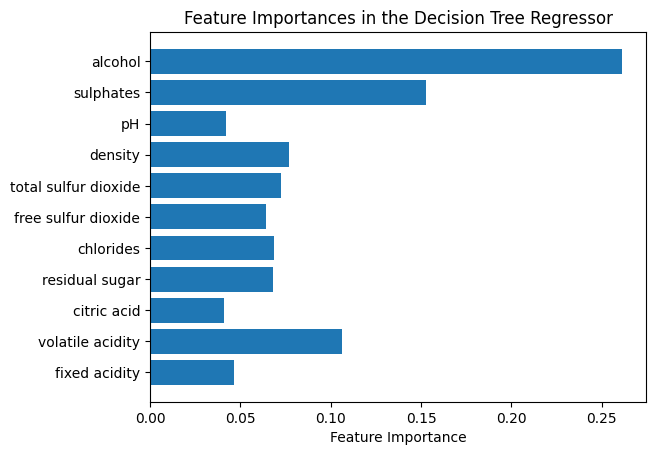

In [ ]:
# visualizziamo un grafico delle importanze delle feature:
import matplotlib.pyplot as plt
importances = tree_regressor.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importances in the Decision Tree Regressor")
plt.show()